In [783]:
# Importing necessary packages
import os
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

from pandas import concat
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [784]:
# Both features and target have already been scaled: mean = 0; SD = 1
DATA_FOLDER = './'
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Houseprice_data_scaled.csv'))
data_1 = pd.read_csv(os.path.join(DATA_FOLDER, 'Original_Data.csv'))
#data = pd.read_csv(r'Houseprice_data_scaled.csv')
#data_1 = pd.read_csv(r'Original_Data.csv')

In [785]:
data_1 = pd.DataFrame(data_1)

In [786]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [787]:
len(data) == len(data_1)

True

In [788]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

<AxesSubplot:ylabel='Frequency'>

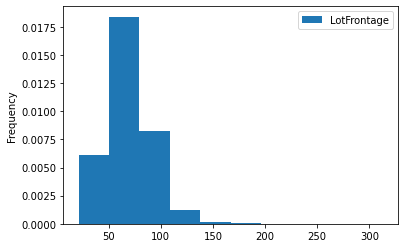

In [789]:
data_1.plot(kind='hist', y='LotFrontage', density=True)


In [790]:
data_1['LotFrontage'].describe()

count    2422.000000
mean       69.083815
std        22.691072
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

***Cleaning Data***

Dealing with missing values. Following ways:

1. Removing missing values
2. Assigning Mean value
3. Assigning Random values from set of observations for the variable

***Removing Missing Values***

In [791]:
a = ['Id', 'LotFrontage']

In [792]:
i=0
b = list(data_1.columns)
c = data_1
for i in range(len(b)):
    if b[i] in a:
        i=i+1
    else:
        c = c.drop(b[i], axis=1)
        i=i+1
c

,Id,LotFrontage
0,1,65.0
1,2,80.0
2,3,68.0
3,4,60.0
4,5,84.0
...,...,...
2903,2915,21.0
2904,2916,21.0
2905,2917,160.0
2906,2918,62.0


In [793]:
data["Id"]=c["Id"]
same = pd.merge(data, c, on='Id')
#same = pd.concat([data, c],axis=1)
same.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,Id,LotFrontage
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,1,65.0
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,2,80.0
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,3,68.0
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,4,60.0
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,5,84.0


In [794]:
len(same)

2908

In [795]:
miss = same.dropna()

In [796]:
miss['LotFrontage'] = miss['LotFrontage'].astype(int)

/var/folders/3p/nwvghs2n18z16lx14xfm72j40000gn/T/ipykernel_13681/255569117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss['LotFrontage'] = miss['LotFrontage'].astype(int)


In [797]:
d = miss['LotFrontage'] 
miss['streetft'] = (d - d.mean()) / d.std()

/var/folders/3p/nwvghs2n18z16lx14xfm72j40000gn/T/ipykernel_13681/2411698412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss['streetft'] = (d - d.mean()) / d.std()


In [798]:
miss['streetft']

0      -0.179975
1       0.481078
2      -0.047764
3      -0.400326
4       0.657359
          ...   
2903   -2.119063
2904   -2.119063
2905    4.006694
2906   -0.312185
2907    0.216657
Name: streetft, Length: 2422, dtype: float64

In [799]:
miss = miss.drop('LotFrontage', axis=1)

In [800]:
miss_f = miss.drop('Id', axis=1)

In [801]:
e = miss_f.isnull()
True in e

False

In [802]:
miss_f.to_csv(DATA_FOLDER+'B_dataset.csv',header=True)

In [803]:
train_m = miss_f.iloc[:1600]
val_m = miss_f.iloc[1600:2100]
test_m = miss_f.iloc[2100:]

In [804]:
X_train_m, X_val_m, X_test_m = train_m.drop('Sale Price', axis=1), val_m.drop('Sale Price', axis=1), test_m.drop('Sale Price', axis=1)
y_train_m, y_val_m, y_test_m = train_m[['Sale Price']], val_m[['Sale Price']], test_m[['Sale Price']]

***Assigning Mean value***

In [805]:
avg = same.fillna(value=d.mean())

In [806]:
e = avg.isnull()
True in e

False

In [807]:
lot = avg['LotFrontage']
avg['streetft'] = (lot - lot.mean()) / lot.std()

In [808]:
avg = avg.drop('LotFrontage', axis=1)

In [809]:
avg_f = avg.drop('Id', axis=1)

In [810]:
train_av = avg_f.iloc[:1800]
val_av = avg_f.iloc[1800:2400]
test_av = avg_f.iloc[2400:]

In [811]:
X_train_av, X_val_av, X_test_av = train_av.drop('Sale Price', axis=1), val_av.drop('Sale Price', axis=1), test_av.drop('Sale Price', axis=1)
y_train_av, y_val_av, y_test_av = train_av[['Sale Price']], val_av[['Sale Price']], test_av[['Sale Price']]

***Assigning Random values from set of observations for the variable***

In [812]:
import random

In [813]:
f = d.unique()

In [814]:
g = list(same['Id'])
h= list(miss['Id'])

In [815]:
i=0
j = []
for i in range(len(g)):
    if g[i] in h:
        i=i+1
    else:
        j.append(g[i])

In [816]:
len(j)

486

In [817]:
rd = same
rd = pd.DataFrame(rd)
rd.set_index('Id', inplace=True)

In [818]:
i=0
for i in range(len(g)):
    if g[i] in j:
        i=i+1
    else:
        rd = rd.drop(g[i], axis=0)
        i=i+1

In [819]:
rd.reset_index(inplace=True)

In [820]:
i=0
for i in range(len(rd)):
    rand_idx = random.randrange(len(f))
    rd['LotFrontage'][i] = f[rand_idx] 
    i=i+1

/var/folders/3p/nwvghs2n18z16lx14xfm72j40000gn/T/ipykernel_13681/531391326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['LotFrontage'][i] = f[rand_idx]


In [821]:
rd['LotFrontage'] = rd['LotFrontage'].astype(int)

In [822]:
rd['streetft'] = (rd['LotFrontage'] - rd['LotFrontage'].mean()) / rd['LotFrontage'].std()

In [823]:
rd = rd.drop('LotFrontage', axis=1)

In [824]:
rd1 = pd.concat([miss, rd], axis=0)

In [825]:
rd1 = rd1.drop('Id', axis=1)

In [826]:
rd1.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,streetft
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.179975
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.481078
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,-0.047764
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,-0.400326
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,0.657359


In [827]:
train_r = rd1.iloc[:1800] 
val_r = rd1.iloc[1800:2400]
test_r = rd1.iloc[2400:]

In [828]:
X_train_r, X_val_r, X_test_r = train_r.drop('Sale Price', axis=1), val_r.drop('Sale Price', axis=1), test_r.drop('Sale Price', axis=1)
y_train_r, y_val_r, y_test_r = train_r[['Sale Price']], val_r[['Sale Price']], test_r[['Sale Price']] 




###### Linear Regression

In [829]:
# Importing models
from sklearn.linear_model import LinearRegression

In [830]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [831]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.079
OverallQual,0.214395
OverallCond,0.096479
YearBuilt,0.160799
YearRemodAdd,0.025352
BsmtFinSF1,0.091466
BsmtUnfSF,-0.03308
TotalBsmtSF,0.138199


**1**

In [832]:
lr_m=LinearRegression()
lr_m.fit(X_train_m,y_train_m)

LinearRegression()

In [833]:
coeffs_m = pd.DataFrame(
    [
        ['intercept'] + list(X_train_m.columns),
        list(lr_m.intercept_) + list(lr_m.coef_[0])
    ]
).transpose().set_index(0)
coeffs_m

,1
0,
intercept,69.586767
LotArea,0.11051
OverallQual,0.204878
OverallCond,0.101786
YearBuilt,0.17083
YearRemodAdd,0.026167
BsmtFinSF1,0.102766
BsmtUnfSF,-0.030145
TotalBsmtSF,0.121857


In [834]:
lr_m.score(X_train_m,y_train_m)

0.894422005959208

In [835]:
ypred_m = lr_m.predict(X_test_m)
print(ypred_m[0])
print((ypred_m[0]*data_1['SalePrice'].std())+data_1['SalePrice'].mean())

[0.86053543]
[247513.66971281]


**2**

In [836]:
lr_av=LinearRegression()
lr_av.fit(X_train_av,y_train_av)

LinearRegression()

In [837]:
coeffs_av = pd.DataFrame(
    [
        ['intercept'] + list(X_train_av.columns),
        list(lr_av.intercept_) + list(lr_av.coef_[0])
    ]
).transpose().set_index(0)
coeffs_av

,1
0,
intercept,-0.000759
LotArea,0.071456
OverallQual,0.21279
OverallCond,0.097333
YearBuilt,0.16581
YearRemodAdd,0.027193
BsmtFinSF1,0.09174
BsmtUnfSF,-0.033845
TotalBsmtSF,0.141118


In [838]:
lr_av.score(X_train_av,y_train_av)

0.8878587627685236

In [839]:
ypred_av = lr_av.predict(X_test_av)

print(ypred_av[0])
print((ypred_av[0]*data_1['SalePrice'].std())+data_1['SalePrice'].mean())

[-0.63015842]
[131032.20725601]


**3**

In [840]:
lr_r=LinearRegression()
lr_r.fit(X_train_r,y_train_r)

LinearRegression()

In [841]:
coeffs_r = pd.DataFrame(
    [
        ['intercept'] + list(X_train_r.columns),
        list(lr_r.intercept_) + list(lr_r.coef_[0])
    ]
).transpose().set_index(0)
coeffs_r

,1
0,
intercept,0.010004
LotArea,0.111641
OverallQual,0.210647
OverallCond,0.093148
YearBuilt,0.167066
YearRemodAdd,0.033933
BsmtFinSF1,0.09923
BsmtUnfSF,-0.036709
TotalBsmtSF,0.120514


In [842]:
lr_r.score(X_train_r,y_train_r)

0.897223754603462

In [843]:
ypred_r = lr_r.predict(X_test_r)

print(ypred_r[0])
print((ypred_r[0]*data_1['SalePrice'].std())+data_1['SalePrice'].mean())

[1.33071761]
[284253.27756446]


###### Ridge Regression

In [844]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [845]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091355
0.11710797319753014
0.11723952924901132
0.11741457158889518
0.11762384068711479
0.11825709631198032
0.11900057469147939
0.12254649996292959
0.1307359968074714


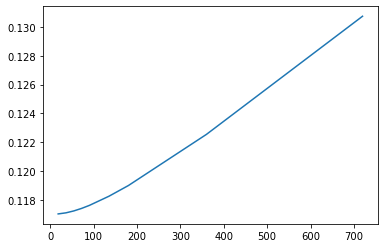

In [846]:
plt.plot(alphas, mses)

0.10709195266368476
0.10711247803757618
0.10719889893335026
0.10733834585036049
0.10752025714283756
0.1081123798569862
0.10884122050430596
0.11244619366656974
0.12089461346664551


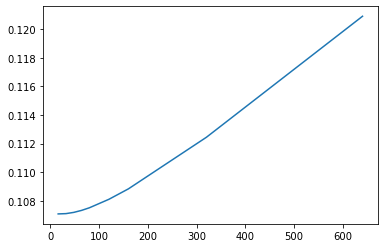

In [847]:
alphas_m=[0.01*1600, 0.02*1600, 0.03*1600, 0.04*1600, 0.05*1600, 0.075*1600,0.1*1600,0.2*1600, 0.4*1600]
mses_m=[]
for alpha in alphas_m:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_m,y_train_m)
    pred=ridge.predict(X_val_m)
    mses_m.append(mse(y_val_m,pred))
    print(mse(y_val_m,pred))
    
plt.plot(alphas_m, mses_m)

0.11326374932587423
0.1133489364324503
0.11349100794544886
0.11367624830307217
0.1138950990202757
0.1145491280131559
0.11530911864681821
0.11889333709447233
0.12710140486531907


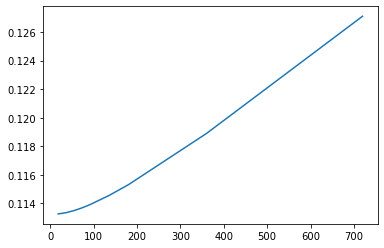

In [848]:
alphas_av=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses_av=[]
for alpha in alphas_av:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_av,y_train_av)
    pred=ridge.predict(X_val_av)
    mses_av.append(mse(y_val_av,pred))
    print(mse(y_val_av,pred))
plt.plot(alphas_av, mses_av)

0.12568603084387123
0.126057900333669
0.12647108908588775
0.12691459897331914
0.12738069319104736
0.12861107960095225
0.12989519301431376
0.1351712621550372
0.14554610880386415


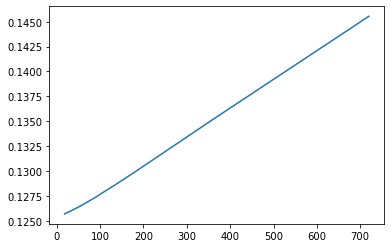

In [849]:
alphas_r=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses_r=[]
for alpha in alphas_r:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_r,y_train_r)
    pred=ridge.predict(X_val_r)
    mses_r.append(mse(y_val_r,pred))
    print(mse(y_val_r,pred))
plt.plot(alphas_r, mses_r)

###### Lasso

In [850]:
# Import Lasso
from sklearn.linear_model import Lasso

In [851]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [852]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.044304
OverallQual,0.298079
OverallCond,0.0
YearBuilt,0.052091
YearRemodAdd,0.064471
BsmtFinSF1,0.115875
BsmtUnfSF,-0.0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [853]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11654751909608796
0.11682687945311095
0.11803348353132033
0.12012836764958999
0.12301536903084047
0.13178576395045638
0.14017194584483778


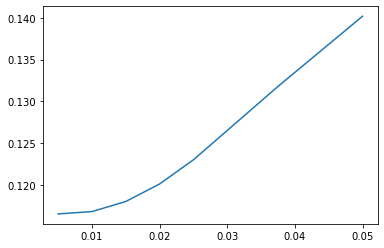

In [854]:
plt.plot(alphas, mses)

                      1
0                      
intercept      0.001459
LotArea        0.053801
OverallQual    0.291134
OverallCond         0.0
YearBuilt      0.058161
YearRemodAdd   0.064823
BsmtFinSF1     0.128168
BsmtUnfSF          -0.0
TotalBsmtSF    0.099382
1stFlrSF       0.028431
2ndFlrSF            0.0
GrLivArea      0.292673
FullBath            0.0
HalfBath            0.0
BedroomAbvGr       -0.0
TotRmsAbvGrd        0.0
Fireplaces     0.024159
GarageCars     0.030913
GarageArea     0.069702
WoodDeckSF          0.0
OpenPorchSF    0.003312
EnclosedPorch      -0.0
Blmngtn            -0.0
Blueste            -0.0
BrDale             -0.0
BrkSide             0.0
ClearCr             0.0
CollgCr            -0.0
Crawfor             0.0
Edwards            -0.0
Gilbert            -0.0
IDOTRR             -0.0
MeadowV            -0.0
Mitchel            -0.0
Names              -0.0
NoRidge        0.003285
NPkVill            -0.0
NriddgHt        0.08513
NWAmes             -0.0
OLDTown         

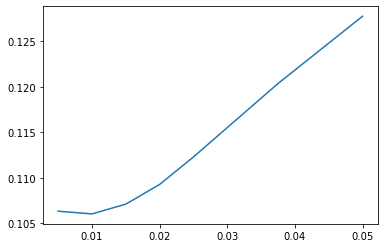

In [855]:
lasso_m = Lasso(alpha=0.05)
lasso_m.fit(X_train_m, y_train_m)

coeffs_m = pd.DataFrame(
    [
        ['intercept'] + list(X_train_m.columns),
        list(lasso_m.intercept_) + list(lasso_m.coef_)
    ]
).transpose().set_index(0)
print(coeffs_m)

alphas_m=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses_m=[]
for alpha in alphas_m:
    lasso_m=Lasso(alpha=alpha)
    lasso_m.fit(X_train_m,y_train_m)
    pred=lasso_m.predict(X_val_m)
    mses_m.append(mse(y_val_m,pred))
    print(mse(y_val_m, pred))
    
plt.plot(alphas_m, mses_m)

                      1
0                      
intercept     -0.000182
LotArea        0.041762
OverallQual     0.29864
OverallCond         0.0
YearBuilt      0.052163
YearRemodAdd   0.065166
BsmtFinSF1     0.116103
BsmtUnfSF          -0.0
TotalBsmtSF    0.103082
1stFlrSF       0.029274
2ndFlrSF            0.0
GrLivArea       0.29563
FullBath            0.0
HalfBath            0.0
BedroomAbvGr       -0.0
TotRmsAbvGrd        0.0
Fireplaces     0.020439
GarageCars     0.027274
GarageArea     0.064521
WoodDeckSF      0.00178
OpenPorchSF    0.002195
EnclosedPorch      -0.0
Blmngtn            -0.0
Blueste            -0.0
BrDale             -0.0
BrkSide             0.0
ClearCr             0.0
CollgCr            -0.0
Crawfor             0.0
Edwards            -0.0
Gilbert            -0.0
IDOTRR             -0.0
MeadowV            -0.0
Mitchel            -0.0
Names              -0.0
NoRidge        0.012734
NPkVill            -0.0
NriddgHt       0.083602
NWAmes             -0.0
OLDTown         

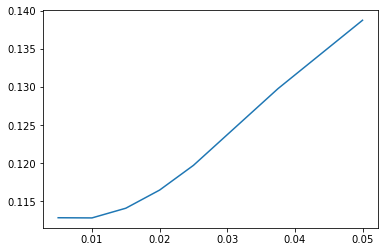

In [856]:
lasso_av = Lasso(alpha=0.05)
lasso_av.fit(X_train_av, y_train_av)

coeffs_av = pd.DataFrame(
    [
        ['intercept'] + list(X_train_av.columns),
        list(lasso_av.intercept_) + list(lasso_av.coef_)
    ]
).transpose().set_index(0)
print(coeffs_av)

alphas_av=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses_av=[]
for alpha in alphas_av:
    lasso_av=Lasso(alpha=alpha)
    lasso_av.fit(X_train_av,y_train_av)
    pred=lasso_av.predict(X_val_av)
    mses_av.append(mse(y_val_av,pred))
    print(mse(y_val_av, pred))
    
plt.plot(alphas_av, mses_av)

                      1
0                      
intercept      0.002703
LotArea        0.046208
OverallQual    0.296671
OverallCond         0.0
YearBuilt        0.0555
YearRemodAdd   0.068304
BsmtFinSF1     0.131313
BsmtUnfSF          -0.0
TotalBsmtSF    0.091206
1stFlrSF       0.032112
2ndFlrSF            0.0
GrLivArea      0.287181
FullBath            0.0
HalfBath            0.0
BedroomAbvGr       -0.0
TotRmsAbvGrd        0.0
Fireplaces     0.027517
GarageCars     0.009254
GarageArea      0.09078
WoodDeckSF          0.0
OpenPorchSF    0.000594
EnclosedPorch      -0.0
Blmngtn            -0.0
Blueste            -0.0
BrDale             -0.0
BrkSide             0.0
ClearCr             0.0
CollgCr            -0.0
Crawfor             0.0
Edwards            -0.0
Gilbert            -0.0
IDOTRR             -0.0
MeadowV            -0.0
Mitchel            -0.0
Names              -0.0
NoRidge        0.006288
NPkVill            -0.0
NriddgHt       0.081712
NWAmes             -0.0
OLDTown         

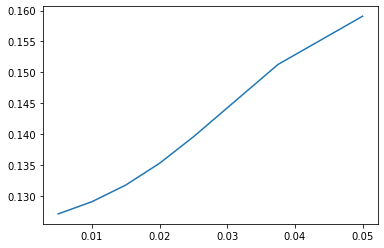

In [857]:
lasso_r = Lasso(alpha=0.05)
lasso_r.fit(X_train_r, y_train_r)

coeffs_r = pd.DataFrame(
    [
        ['intercept'] + list(X_train_r.columns),
        list(lasso_r.intercept_) + list(lasso_r.coef_)
    ]
).transpose().set_index(0)
print(coeffs_r)

alphas_r=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses_r=[]
for alpha in alphas_r:
    lasso_r=Lasso(alpha=alpha)
    lasso_r.fit(X_train_r,y_train_r)
    pred=lasso_r.predict(X_val_r)
    mses_r.append(mse(y_val_r,pred))
    print(mse(y_val_r, pred))
    
plt.plot(alphas_r, mses_r)

# PART B

In [858]:
# Make sure to Run data cleaning 3 in question A before running this.
data_b_raw=rd1.copy() 
data_b_raw["LotShape"]=data_1["LotShape"]

In [859]:
data_b_raw.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,streetft,LotShape
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.179975,Reg
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.481078,Reg
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,-0.047764,IR1
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,-0.400326,IR1
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,0.657359,IR1


In [860]:
# Names for columns and values for ordered dummy variables
LotShapes = [ "Regular","Irregular1", "Irregular2", "Irregular3"]
factors=[4,3,2,1]
# Creates dummy variables
Dummies_OneHot=pd.get_dummies(data=data_b_raw[['LotShape']])


In [861]:
#Reorders columns
Unordered_Cols=Dummies_OneHot.columns
Ordered_cols=[]
for i in range(-1,len(Unordered_Cols)-1):
    Ordered_cols.append(Unordered_Cols[i])
Ordered_cols

['LotShape_Reg', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3']

In [862]:
# Creates the dataframe with scaled values for the dummies 4 for regular 3 for Iregular 1 and so on. 
Dummies_OneHot.set_axis(LotShapes,axis=1,inplace=True)
Dummies_ordered=Dummies_OneHot.copy()
for i in range(4):
    Dummies_ordered[LotShapes[i]]=Dummies_OneHot[LotShapes[i]]*factors[i]
Dummies_ordered["Id"]=c["Id"]    
Dummies_ordered


,Regular,Irregular1,Irregular2,Irregular3,Id
0,0,0,0,1,1
1,0,0,0,1,2
2,4,0,0,0,3
3,4,0,0,0,4
4,4,0,0,0,5
...,...,...,...,...,...
481,4,0,0,0,482
482,0,0,0,1,483
483,0,0,0,1,484
484,4,0,0,0,485


In [863]:
#Merges with original datafram and removes lotshape
data_b_raw["Id"]=c["Id"]
Data_B = pd.merge(data_b_raw,Dummies_ordered , on='Id')
Data_B=Data_B.drop(["Id","LotShape"],axis=1)
Data_B


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,streetft,Regular,Irregular1,Irregular2,Irregular3
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.179975,0,0,0,1
1,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.179975,0,0,0,1
2,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.788399,0.118940,-0.137934,1.505100,...,-0.127929,-0.152629,-0.091644,0.584308,0.248417,-1.550895,0,0,0,1
3,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.788399,0.118940,-0.137934,1.505100,...,-0.127929,-0.152629,-0.091644,0.584308,0.248417,-1.550895,0,0,0,1
4,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.481078,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,-0.111939,-0.797802,0.388309,-0.330915,0.827310,0.383334,-0.707210,-0.463296,0.140043,-0.789421,...,-0.127929,-0.152629,-0.091644,-0.577852,-0.476762,1.111602,0,0,0,1
3706,-0.104396,-0.797802,-0.512407,-0.230689,-0.965106,0.250980,-0.305775,-0.175772,-0.466695,-0.789421,...,-0.127929,-0.152629,-0.091644,-0.577852,-0.709855,0.321879,4,0,0,0
3707,-0.643617,0.652747,-0.512407,1.038851,0.875754,-1.013221,-0.080251,-1.263571,-1.680171,0.494391,...,-0.127929,-0.152629,-0.091644,0.584308,-0.541510,1.562873,0,0,0,1
3708,-0.070896,-0.072527,0.388309,-0.464551,-1.304211,-0.549985,0.794786,0.152485,0.474149,-0.789421,...,-0.127929,-0.152629,-0.091644,-0.577852,-0.243669,0.186497,4,0,0,0


In [864]:
# Divide in training validation and test
train_B = Data_B.iloc[:1800] 
val_B = Data_B.iloc[1800:2400]
test_B = Data_B.iloc[2400:]

In [865]:
# Get X and Y
X_train_B, X_val_B, X_test_B = train_B.drop('Sale Price', axis=1), val_B.drop('Sale Price', axis=1), test_B.drop('Sale Price', axis=1)
y_train_B, y_val_B, y_test_B = train_B[['Sale Price']], val_B[['Sale Price']], test_B[['Sale Price']] 

Linear Regression

In [866]:
lr_B=LinearRegression()
lr_B.fit(X_train_B,y_train_B)

LinearRegression()

In [867]:
coeffs_B = pd.DataFrame(
    [
        ['intercept'] + list(X_train_B.columns),
        list(lr_B.intercept_) + list(lr_B.coef_[0])
    ]
).transpose().set_index(0)
#coeffs_B

In [868]:
lr_B.score(X_train_B,y_train_B)

0.8954478868638911

In [869]:
ypred_B = lr_B.predict(X_test_B)

print(ypred_B[0])
print((ypred_B[0]*data_1['SalePrice'].std())+data_1['SalePrice'].mean())

[-0.79867966]
[117864.11109302]


Ridge

0.14589191374835342
0.14571561738173497
0.14563655603032993
0.1456270274457186
0.14567152742960102
0.14595883951305022
0.1464274577865855
0.14927986608928487
0.15676726362072146


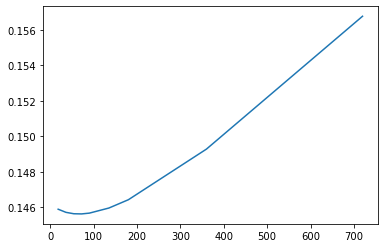

In [870]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas_B=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses_B=[]
for alpha in alphas_B:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_B,y_train_B)
    pred=ridge.predict(X_val_B)
    mses_B.append(mse(y_val_B,pred))    
    print(mse(y_val_B,pred))
plt.plot(alphas_B, mses_B)

Lasso

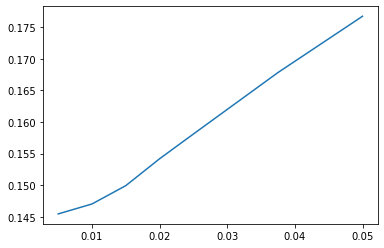

In [871]:
lasso_B = Lasso(alpha=0.05)
lasso_B.fit(X_train_B, y_train_B)
zeros=[]
coeffs_B = pd.DataFrame(
    [
        ['intercept'] + list(X_train_B.columns),
        list(lasso_B.intercept_) + list(lasso_B.coef_)
    ]
).transpose().set_index(0)

#print(coeffs_B)

alphas_B=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses_B=[]


for alpha in alphas_B:
    lasso_B=Lasso(alpha=alpha)
    lasso_B.fit(X_train_B,y_train_B)
    pred=lasso_B.predict(X_val_B)
    mses_B.append(mse(y_val_B,pred))
    a=coeffs_B==0
    zeros.append(int(a.sum()))
    #print(mse(y_val_B, pred))
    #print(mse(y_val_B,pred))
    
plt.plot(alphas_B, mses_B)

In [872]:
Number_of_zeroes=coeffs_B==0
Number_of_zeroes.sum()

1    34
dtype: int64

In [873]:
lasso_B.score(X_train_B, y_train_B)

0.8599725538369876

# PART C

In [874]:
#Adding Two New Variables
#We will be adding HouseStyle and SaleType variables to our data set. 

#Creating dummy variables

HouseStyle_Dummy = pd.get_dummies(data_1['HouseStyle'])
SaleType_Dummy = pd.get_dummies(data_1['SaleType'])

#Scaling the Dummy Variables
for col in HouseStyle_Dummy.columns: 
    HouseStyle_Dummy[col] = (HouseStyle_Dummy[col]-HouseStyle_Dummy[col].mean())/HouseStyle_Dummy[col].std()
    
for col in SaleType_Dummy.columns: 
    SaleType_Dummy[col] = (SaleType_Dummy[col]-SaleType_Dummy[col].mean())/SaleType_Dummy[col].std()

HouseStyle_Dummy['Id']=data_1['Id']
SaleType_Dummy['Id']=data_1['Id']

#Merge into House Price Data File 

Data_B['Id'] = data_1['Id']
Data_C = pd.merge(Data_B, HouseStyle_Dummy, on='Id')
Data_C = pd.merge(Data_C, SaleType_Dummy, on='Id')
Data_C = Data_C.drop(["Id"],axis=1)


In [875]:
# Divide in training validation and test
train_C = Data_C.iloc[:1800] 
val_C = Data_C.iloc[1800:2400]
test_C = Data_C.iloc[2400:]

# Get X and Y
X_train_C, X_val_C, X_test_C = train_C.drop('Sale Price', axis=1), val_C.drop('Sale Price', axis=1), test_C.drop('Sale Price', axis=1)
y_train_C, y_val_C, y_test_C = train_C[['Sale Price']], val_C[['Sale Price']], test_C[['Sale Price']] 

Linear Regression

In [876]:
lr_C=LinearRegression()
lr_C.fit(X_train_C,y_train_C)
coeffs_C = pd.DataFrame(
    [
        ['intercept'] + list(X_train_C.columns),
        list(lr_C.intercept_) + list(lr_C.coef_[0])
    ]
).transpose().set_index(0)
#coeffs_C
lr_C.score(X_train_C,y_train_C)

ypred_C = lr_C.predict(X_test_C)

print(ypred_C[0])
print((ypred_C[0]*data_1['SalePrice'].std())+data_1['SalePrice'].mean())


[-0.80700684]
[117213.43311289]


Ridge

0.14760753395769383
0.1474089147570597
0.14730953527660073
0.1472811947399165
0.14730813503053136
0.1475559681761602
0.1479900881785046
0.15073665017096044
0.15809204184581874


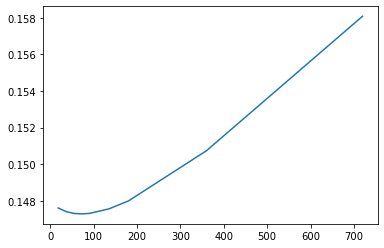

In [877]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas_C=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses_C=[]
for alpha in alphas_C:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_C,y_train_C)
    pred=ridge.predict(X_val_C)
    mses_C.append(mse(y_val_C,pred))    
    print(mse(y_val_C,pred))
plt.plot(alphas_C, mses_C)

Lasso

0.14611922664374882
0.14611922664374882
0.147253328898782
0.147253328898782
0.14992321213276638
0.14992321213276638
0.15417960383315696
0.15417960383315696
0.15809500955793587
0.15809500955793587
0.16781925462865918
0.16781925462865918
0.17672457117848647
0.17672457117848647


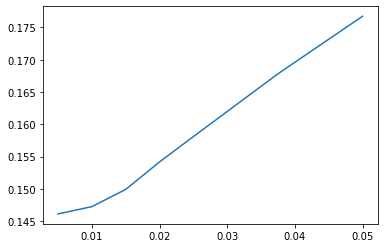

In [878]:
lasso_C = Lasso(alpha=0.05)
lasso_C.fit(X_train_C, y_train_C)
zeros=[]
coeffs_C = pd.DataFrame(
    [
        ['intercept'] + list(X_train_C.columns),
        list(lasso_C.intercept_) + list(lasso_C.coef_)
    ]
).transpose().set_index(0)


alphas_C=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses_C=[]


for alpha in alphas_C:
    lasso_C=Lasso(alpha=alpha)
    lasso_C.fit(X_train_C,y_train_C)
    pred=lasso_C.predict(X_val_C)
    mses_C.append(mse(y_val_C,pred))
    a=coeffs_C==0
    zeros.append(int(a.sum()))
    print(mse(y_val_C, pred))
    print(mse(y_val_C,pred))
    

plt.plot(alphas_C, mses_C)

In [879]:

Number_of_zeroes=coeffs_C==0
Number_of_zeroes.sum()

1    51
dtype: int64

In [880]:
lasso_C.score(X_train_C, y_train_C)

0.8599725538369876

# PART D

In [881]:
# dataset cleaned with randomly assigned observations was chosen

#Linear Regression Scoring
print(lr_r.score(X_train_r,y_train_r),lr_B.score(X_train_B,y_train_B),lr_C.score(X_train_C,y_train_C))


#Lasso Scoring
print(lasso_r.score(X_train_r, y_train_r), lasso_B.score(X_train_B, y_train_B), lasso_C.score(X_train_C, y_train_C))

#Ridge Scoring
#Part A has lower RMSE than B and C at each alpha level


0.897223754603462 0.8954478868638911 0.8957642931990568
0.8680771782819183 0.8599725538369876 0.8599725538369876


In [882]:
#B and C are unusually close
#Ridge A 
0.12568603084387123
0.126057900333669
0.12647108908588775
0.12691459897331914
0.12738069319104736
0.12861107960095225
0.12989519301431376
0.1351712621550372
0.14554610880386415
#Ridge B
0.14615471599265428
0.1459905931310339
0.1459135720283322
0.1458997996416985
0.14593577700278842
0.14619020636323807
0.14661691044797626
0.1492849244220201
0.15648336364174734
#Ridge C
0.14615471599265428
0.1459905931310339
0.1459135720283322
0.1458997996416985
0.14593577700278842
0.14619020636323807
0.14661691044797626
0.1492849244220201
0.15648336364174734

0.15648336364174734

In [883]:
rd1.head()
#Randomly split data into training set, validation set, 
# and test set – maintain the same splitting proportion 1800/600/rest
# respectively

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,streetft
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.179975
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.481078
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,-0.047764
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,-0.400326
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,0.657359


In [884]:
Xd = rd1.drop('Sale Price', axis=1)
Yd = rd1[['Sale Price']]


In [885]:
from sklearn.model_selection import train_test_split

In [886]:
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(Xd, Yd,
    test_size=508, random_state = 8)


In [887]:
# Use the same function above for the validation set
X_train_D, X_val_D, y_train_D, y_val_D = train_test_split(X_train_D, y_train_D, 
    test_size=600, random_state= 8) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train_D.shape))
print("X_test shape: {}".format(X_test_D.shape))
print("y_train shape: {}".format(y_train_D.shape))
print("y_test shape: {}".format(y_test_D.shape))
print("X_val shape: {}".format(X_val_D.shape))
print("y val shape: {}".format(y_val_D.shape))

X_train shape: (1800, 48)
X_test shape: (508, 48)
y_train shape: (1800, 1)
y_test shape: (508, 1)
X_val shape: (600, 48)
y val shape: (600, 1)


Linear Regression

In [888]:
lr_D=LinearRegression()
lr_D.fit(X_train_D,y_train_D)

LinearRegression()

In [889]:
coeffs_D = pd.DataFrame(
    [
        ['intercept'] + list(X_train_D.columns),
        list(lr_D.intercept_) + list(lr_D.coef_[0])
    ]
).transpose().set_index(0)
coeffs_D

,1
0,
intercept,0.009448
LotArea,0.094423
OverallQual,0.219183
OverallCond,0.08172
YearBuilt,0.164522
YearRemodAdd,0.046017
BsmtFinSF1,0.118144
BsmtUnfSF,-0.022644
TotalBsmtSF,0.096451


In [890]:
lr_D.score(X_train_D,y_train_D)

0.8896183604893817

In [891]:
ypred_D = lr_D.predict(X_test_D)

print(ypred_D[0])
print((ypred_D[0]*data_1['SalePrice'].std())+data_1['SalePrice'].mean())

[0.21081633]
[196745.21006527]


Ridge

0.12049985962261914
0.12046948942916927
0.12048003399965211
0.12052586405449837
0.12060052969107085
0.12088332496014
0.12126768722699435
0.12342265468583799
0.1293381185731938


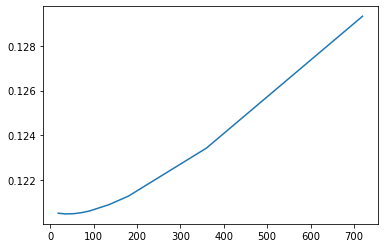

In [892]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas_D=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses_D=[]
for alpha in alphas_D:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_D,y_train_D)
    pred=ridge.predict(X_val_D)
    mses_D.append(mse(y_val_D,pred))    
    print(mse(y_val_D,pred))
plt.plot(alphas_D, mses_D)

Lasso

0.12184563276963263
0.12184563276963263
0.12326956578689556
0.12326956578689556
0.12584851077857445
0.12584851077857445
0.12945212948006848
0.12945212948006848
0.13357626190310895
0.13357626190310895
0.1430379568798302
0.1430379568798302
0.1501244134898565
0.1501244134898565


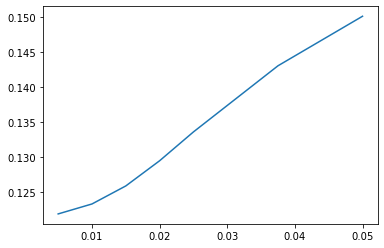

In [893]:
lasso_D = Lasso(alpha=0.05)
lasso_D.fit(X_train_D, y_train_D)
zeros=[]
coeffs_D = pd.DataFrame(
    [
        ['intercept'] + list(X_train_D.columns),
        list(lasso_D.intercept_) + list(lasso_D.coef_)
    ]
).transpose().set_index(0)


alphas_D=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses_D=[]


for alpha in alphas_D:
    lasso_D=Lasso(alpha=alpha)
    lasso_D.fit(X_train_D,y_train_D)
    pred=lasso_D.predict(X_val_D)
    mses_D.append(mse(y_val_D,pred))
    a=coeffs_D==0
    zeros.append(int(a.sum()))
    print(mse(y_val_D, pred))
    print(mse(y_val_D,pred))
    

plt.plot(alphas_D, mses_D)

In [894]:

Number_of_zeroes=coeffs_D==0
Number_of_zeroes.sum()

1    33
dtype: int64

In [895]:
lasso_D.score(X_train_D, y_train_D)

0.8607270279480421

In [896]:
# dataset cleaned with randomly assigned observations was chosen

#Linear Regression Scoring
print(lr_r.score(X_train_r,y_train_r),lr_D.score(X_train_D,y_train_D))


#Lasso Scoring
print(lasso_r.score(X_train_r, y_train_r), lasso_D.score(X_train_D, y_train_D))

#Ridge Scoring
# #Ridge A 
# 0.12568603084387123
# 0.126057900333669
# 0.12647108908588775
# 0.12691459897331914
# 0.12738069319104736
# 0.12861107960095225
# 0.12989519301431376
# 0.1351712621550372
# 0.14554610880386415

# #Ridge D
# 0.11944455185889803
# 0.11942918351741114
# 0.11945788771745545
# 0.1195228906508271
# 0.11961681615818011
# 0.1199456051692106
# 0.12037124046400227
# 0.12264622456867054
# 0.1286778765474493

0.897223754603462 0.8896183604893817
0.8680771782819183 0.8607270279480421
